In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score



In [10]:
#Splitting the data for training and testing
(X_train, _),(X_test,_) = mnist.load_data()
X_train,X_val = X_train[:-10000], X_train[-10000:]

X_train = X_train.astype('float32')/255.
X_test = X_test.astype('float32')/255.
X_val = X_val.astype('float32')/255.

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


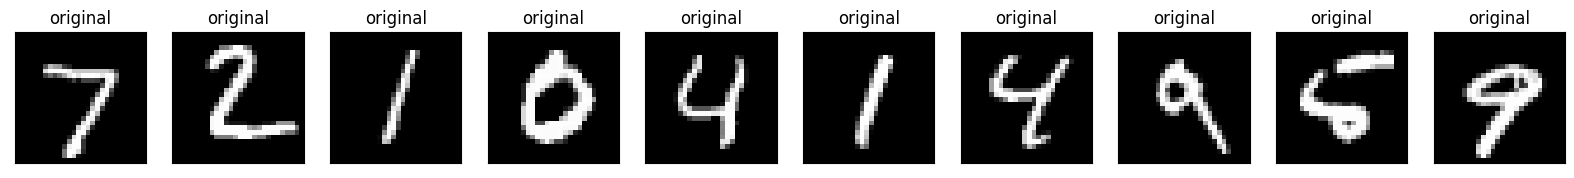

In [12]:
#Visualization of original data
n = 10
plt.figure(figsize = (20,4))
for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(X_test[i])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [13]:
#A simple autoencoder

latent_dim = 32

class Autoencoder(Model):
    def __init__(self,latent_dim):
        super(Autoencoder,self).__init__()
        self.latent_dim = latent_dim
        self.encoder = tf.keras.Sequential([
            layers.Flatten(),
            layers.Dense(128,activation='relu'),
            layers.Dense(64,activation = 'relu'),
            layers.Dense(latent_dim,activation='relu')
        ])
        
        self.decoder = tf.keras.Sequential([
            layers.Dense(64,activation='relu'),
            layers.Dense(128,activation='relu'),
            layers.Dense(784,activation='sigmoid'),
            layers.Reshape((28,28))
        ])
    
    def call(self,x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Autoencoder(latent_dim) 

In [19]:
autoencoder.compile(optimizer='adam',loss = losses.MeanSquaredError(),metrics=['accuracy'])
autoencoder.fit(X_train,X_train, epochs = 10, shuffle = True, validation_data=(X_val,X_val))


Epoch 1/10
1563/1563 [==============================] - 17s 10ms/step - loss: 0.0105 - accuracy: 0.2850 - val_loss: 0.0103 - val_accuracy: 0.2987
Epoch 2/10
1563/1563 [==============================] - 16s 11ms/step - loss: 0.0100 - accuracy: 0.2905 - val_loss: 0.0098 - val_accuracy: 0.3051
Epoch 3/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.0097 - accuracy: 0.2939 - val_loss: 0.0095 - val_accuracy: 0.3048
Epoch 4/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.0094 - accuracy: 0.2954 - val_loss: 0.0095 - val_accuracy: 0.3067
Epoch 5/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.0091 - accuracy: 0.2990 - val_loss: 0.0090 - val_accuracy: 0.3100
Epoch 6/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.0089 - accuracy: 0.3006 - val_loss: 0.0089 - val_accuracy: 0.3113
Epoch 7/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.0087 - accuracy: 0.3015 - val_loss: 0.0089 -

In [21]:
autoencoder.encoder.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


In [22]:
autoencoder.decoder.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
 reshape (Reshape)           (None, 28, 28)            0         
                                                                 
Total params: 111,568
Trainable params: 111,568
Non-trainable params: 0
_________________________________________________________________


In [23]:
encoded_imgs = autoencoder.encoder(X_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

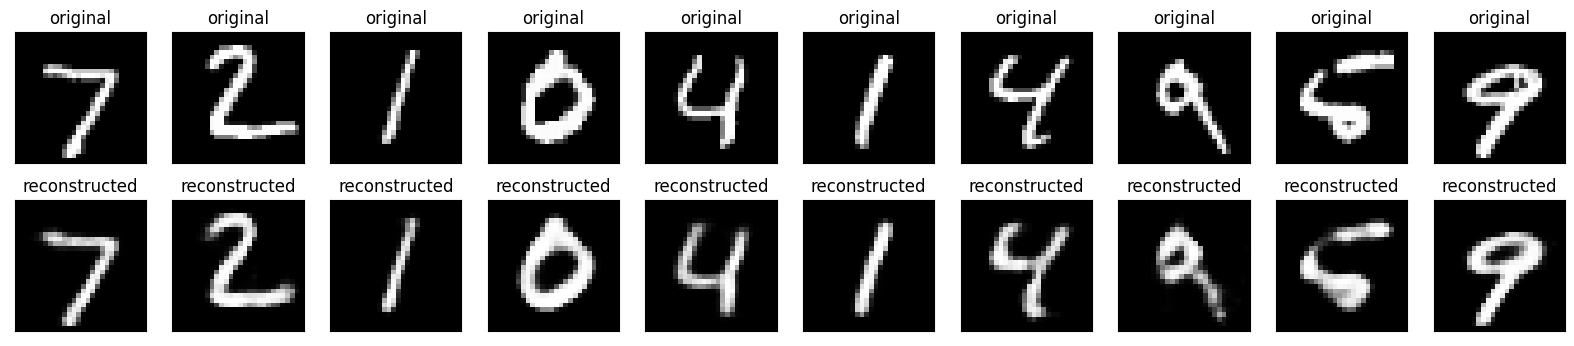

In [27]:
#Visualization of original data and reconstructed ...

n = 10
plt.figure(figsize = (20,4))
for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(X_test[i])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2,n,i+n+1)
    plt.imshow(decoded_imgs[i])
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)    
    
plt.show()
